In [17]:
#pip install pillow

In [18]:
# Si no funciona, descomentar la celda anterior
from PIL import Image
import numpy as np

In [19]:
def adjust_brightness(image_path, output_path, factor):
    # Abre la imagen
    image = Image.open(image_path)

    # Convierte la imagen a una matriz NumPy (array)
    image_array = np.array(image)

    adjusted_image = image_array * factor

    # Multiplica la matriz por el escalar
    # Nos aseguramos de que el resultado se mantenga dentro del rango [0, 255]
    adjusted_array = np.clip(adjusted_image, 0, 255).astype(np.uint8)

    # Convierte la matriz ajustada de nuevo a una imagen
    adjusted_image = Image.fromarray(adjusted_array)

    # Guarda la imagen ajustada
    adjusted_image.save(output_path)
    return adjusted_image

In [20]:
# Ejemplo de uso
# adjust_brightness('input_image.jpg', 'brightened_image.jpg', 1.5)
AI_0 = adjust_brightness('BebeEnPañalesWhat.jpg', 'brightened_image_50.jpg', 0.75)
AI_50 = adjust_brightness('BebeEnPañalesWhat.jpg', 'brightened_image_50.jpg', 1.5)
AI_25 = adjust_brightness('BebeEnPañalesWhat.jpg', 'brightened_image_25.jpg', 1.25)

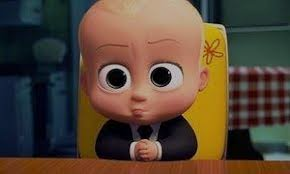

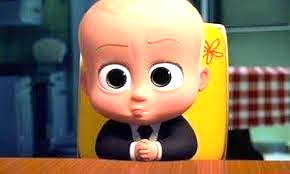

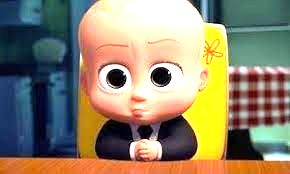

In [21]:
display(AI_0)
display(AI_25)
display(AI_50)

In [14]:
from PIL import Image
import numpy as np

def scale_image(image_path, scale_x, scale_y):
    # Abre la imagen
    image = Image.open(image_path)

    # Convierte la imagen a un array de numpy
    image_array = np.array(image)

    # Obtén las dimensiones de la imagen original
    original_height, original_width = image_array.shape[:2]

    # Calcula las nuevas dimensiones
    new_width = int(original_width * scale_x)
    new_height = int(original_height * scale_y)

    # Crea una nueva imagen con las nuevas dimensiones
    new_image = image.resize((new_width, new_height), Image.Resampling.LANCZOS)

    return new_image

In [15]:
# Ruta de la imagen original
image_path = 'BebeEnPañalesWhat.jpg'

# Factores de escala para las dimensiones x e y
scale_x = 1.5  # Aumentar el ancho en un 50%
scale_y = 1.0  # Mantener la altura igual

# Escalar la imagen
new_image = scale_image(image_path, scale_x, scale_y)

# Guarda la nueva imagen
new_image.save('bebe_resized.jpg')

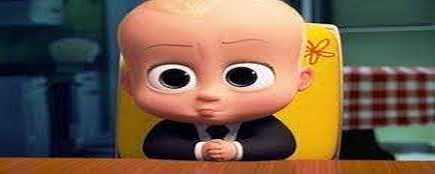

In [16]:
display(new_image)